In [36]:
%matplotlib inline

import pandas as pd

import matplotlib.pyplot as plt

In [42]:
# load csv
epc = pd.read_csv("../data/event_pathcreate.csv")
epd = pd.read_csv("../data/event_pathdelete.csv")
nbr = pd.read_csv("../data/hr_neighbors.csv")

# index by date
epc.loc[:, "date"] = pd.to_datetime(epc.time, unit='s')
epc.set_index(epc["date"], inplace=True)
epd.loc[:, "date"] = pd.to_datetime(epd.time, unit='s')
epd.set_index(epd["date"], inplace=True)
nbr.loc[:, "date"] = pd.to_datetime(nbr.time, unit='s')
nbr.set_index(nbr["date"], inplace=True)


# Network Churn

In [43]:
# removing motes that are not respecting the Dust deployment requirements
excluded_macs = ["00-17-0d-00-00-58-f8-63",
                 "00-17-0d-00-00-58-f8-78",
                 "00-17-0d-00-00-58-eb-69",
                ]

epc_clean = epc[(~epc.source.isin(excluded_macs))
              & (~epc.dest.isin(excluded_macs))
              & (epc['date'] < '2017-01-10')]
epd_clean = epd[(~epd.source.isin(excluded_macs))
              & (~epd.dest.isin(excluded_macs))
              & (epd['date'] < '2017-01-10')]
nbr_clean = nbr[(~nbr.mac.isin(excluded_macs))
              & (~nbr.neighborMac.isin(excluded_macs))
              & (nbr['date'] < '2017-01-10')
              & (nbr.numRxPackets > 0) & (nbr.numTxPackets > 0) & (nbr.numTxFailures >= 0)
]

# grouping results by day
res_epc = epc_clean.groupby(pd.TimeGrouper("1d")).apply(lambda x: len(x))
res_epd = epd_clean.groupby(pd.TimeGrouper("1d")).apply(lambda x: len(x))
res_nbr = nbr_clean.groupby(pd.TimeGrouper("1d")).apply(lambda x: len(x.drop_duplicates(subset=['mac', 'neighborMac'])))

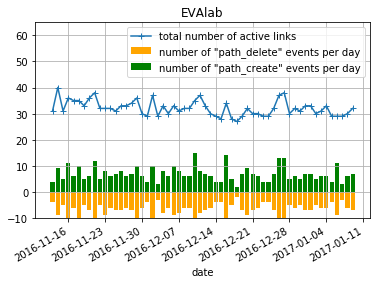

In [44]:
plt.plot(res_nbr.index, res_nbr, '-+', label="total number of active links")
plt.bar(res_epd.index, [-x for x in res_epd], label="number of \"path_delete\" events per day", color="orange")
plt.bar(res_epc.index, res_epc, label="number of \"path_create\" events per day", color="g")

# legend and labels
plt.title("EVAlab")
plt.xlabel('date')
plt.gcf().autofmt_xdate() # make diagonal dates
plt.legend()

plt.grid(True)
plt.ylim([-10, 65])

plt.savefig("../figures/net_churn.eps", format='eps')
plt.show()